In [216]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [92]:
# import the dataset

boston = load_boston()


In [93]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [94]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [95]:
df = pd.DataFrame(data = boston.data, columns= boston.feature_names)

In [96]:
# preview the dataset

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
# add the target variable

df['MEDV'] = boston.target

In [98]:
# let's again preview the dataset

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
# view the dimension of the dataset

df.shape

(506, 14)

In [100]:
# view summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [101]:
# check for the missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [102]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [103]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [104]:
df.duplicated().sum()

0

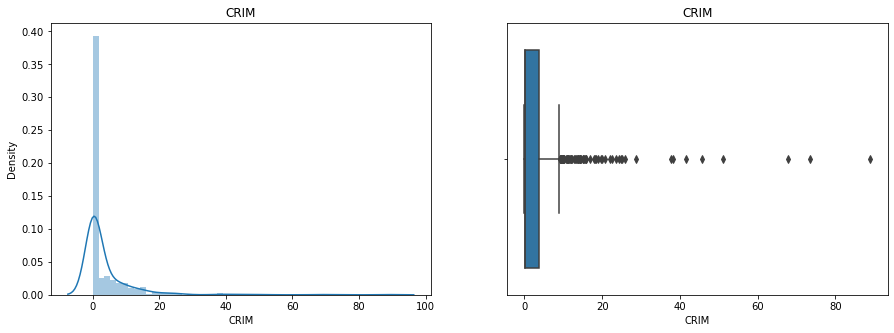

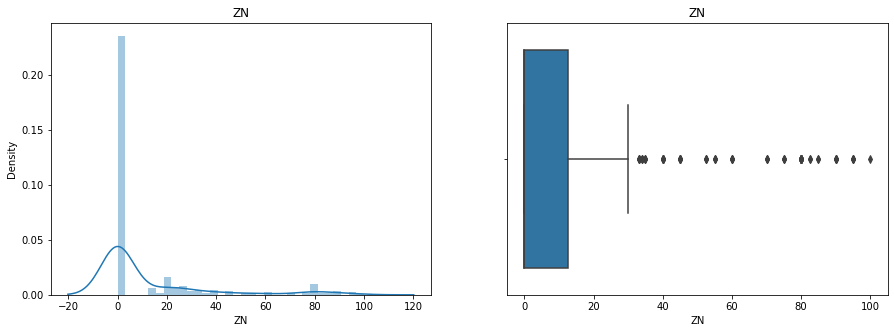

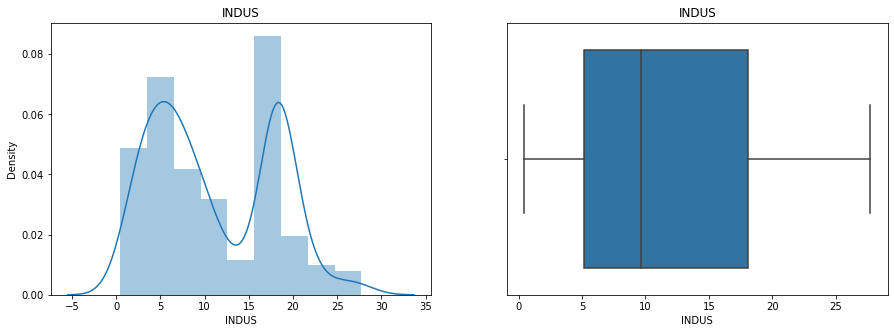

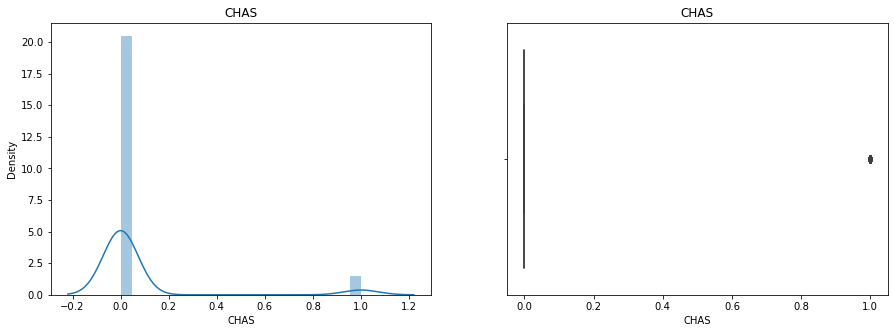

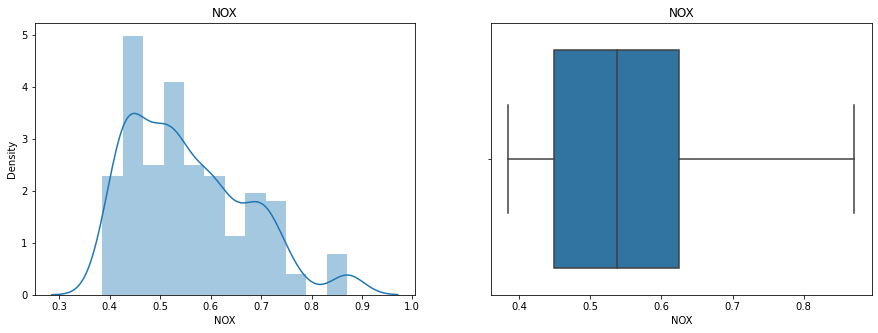

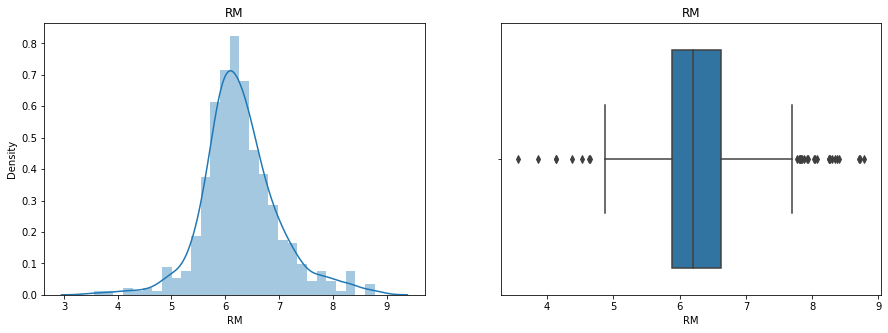

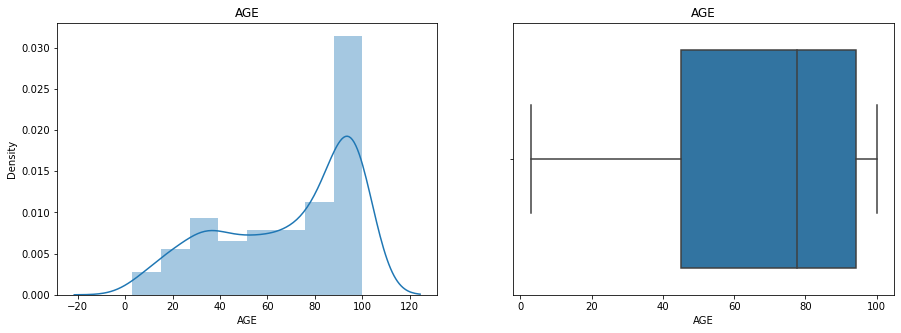

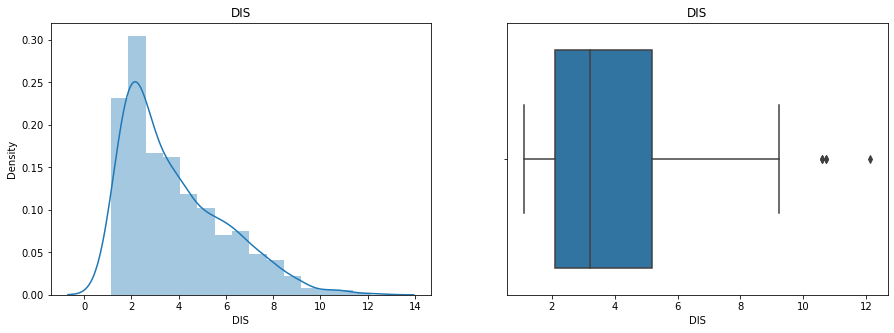

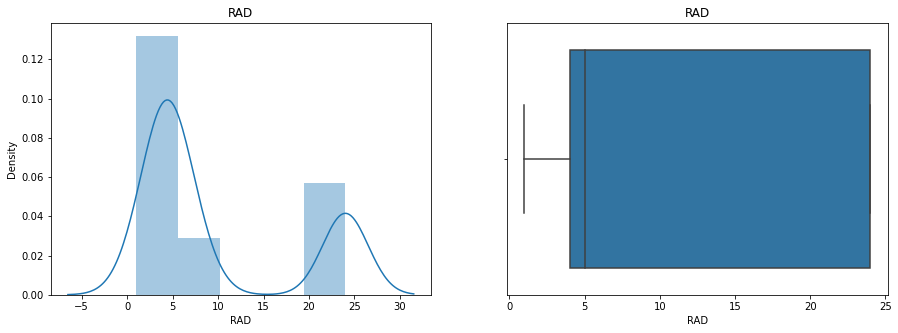

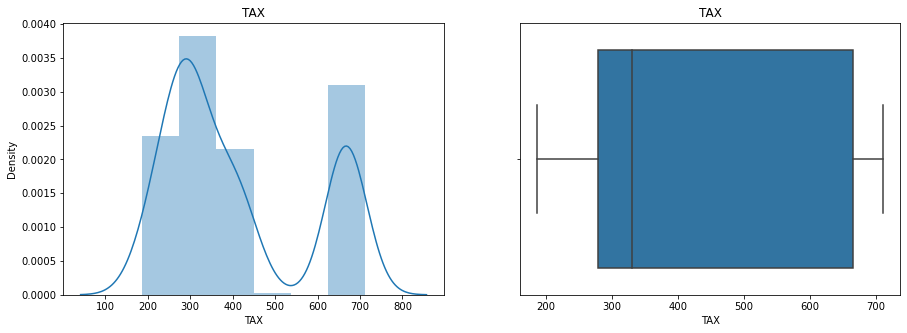

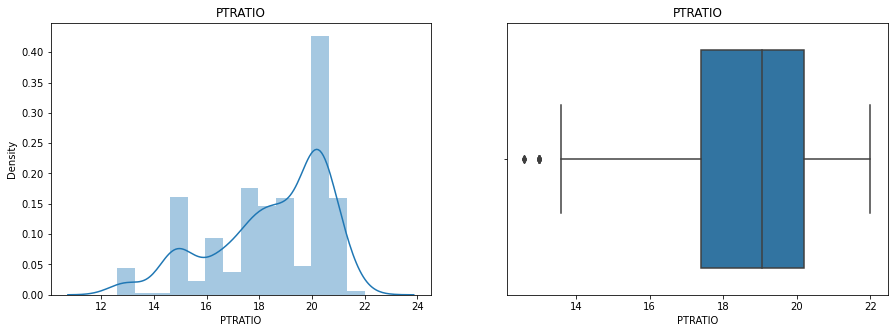

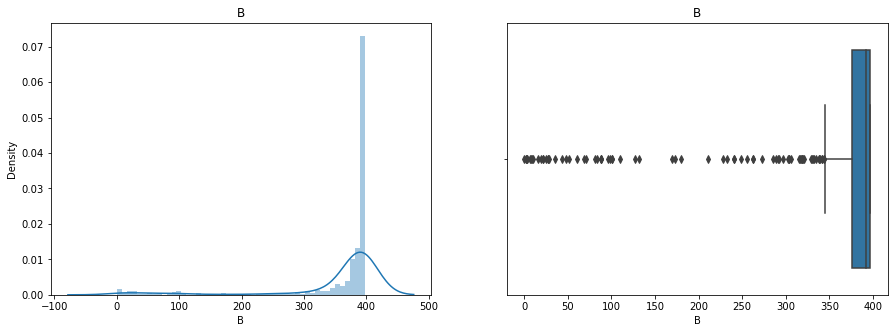

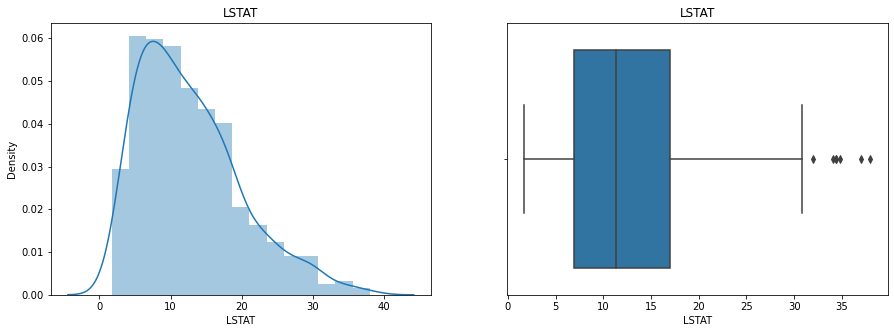

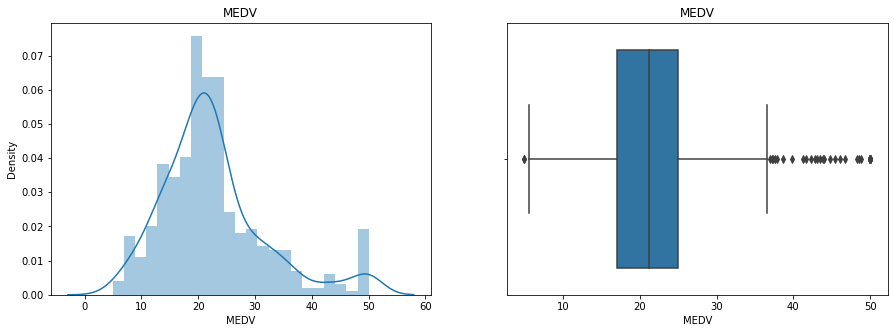

In [105]:
# check frequency distribution of values and outliers in variables

for i in df.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(df[i],label=df.columns)
    plt.title(i)
    
    plt.subplot(122)
    sns.boxplot(df[i])
    plt.title(i)

from the above graph we could notice columns like CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT seems to have outliers.

The histogram also shows that columns CRIM, ZN, B have highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

<AxesSubplot:>

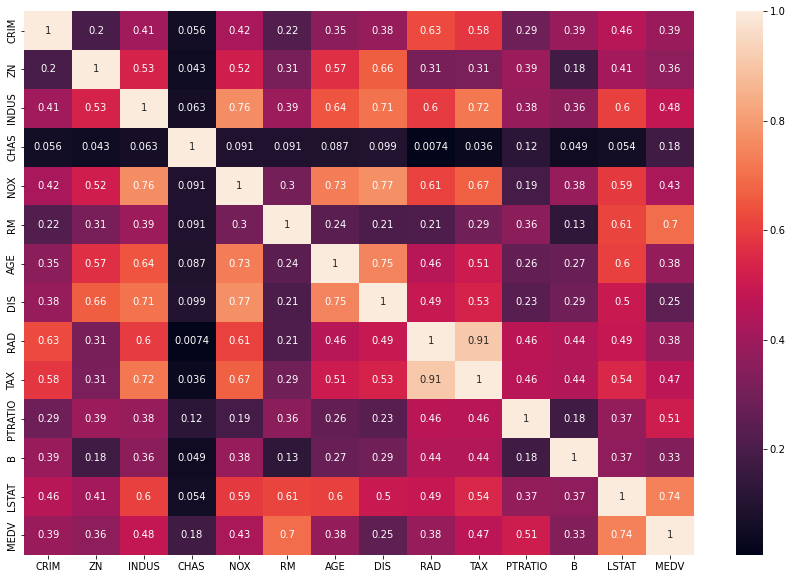

In [106]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From above correlation matrix, we see Tax and RAD are highly correlated features.

RM, PTRATIO, LSTAT features are also highly correlated to MEDV. (Target column)

In [107]:
cols = ['DIS','PTRATIO', 'LSTAT','RM']
q3 = df[cols].quantile(0.75)
q1 = df[cols].quantile(0.25)

In [108]:
iqr = q3-q1

In [109]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

upper_limit, lower_limit

(DIS         9.8208
 PTRATIO    24.4000
 LSTAT      31.9625
 RM          7.7305
 dtype: float64,
 DIS        -2.5322
 PTRATIO    13.2000
 LSTAT      -8.0575
 RM          4.7785
 dtype: float64)

In [110]:

df[cols] = np.where(df[cols] > upper_limit,
        upper_limit,
        np.where(df[cols] < lower_limit,
                lower_limit,
                df[cols]))

<AxesSubplot:xlabel='PTRATIO'>

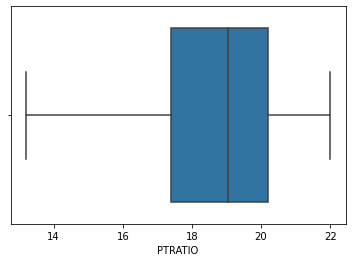

In [111]:
sns.boxplot(df['PTRATIO'])

<AxesSubplot:xlabel='RM'>

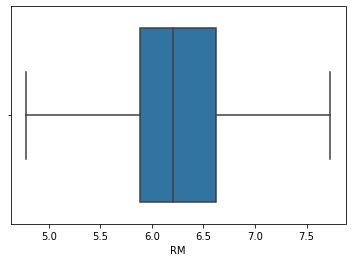

In [112]:
sns.boxplot(df['RM'])

In [113]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.215898,0.352734,-0.384039,0.625505,0.582764,0.291329,-0.385064,0.451391,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.337941,-0.569537,0.660652,-0.311948,-0.314563,-0.389805,0.175520,-0.417450,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.356977,0.608158,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.081545,0.086518,-0.099435,-0.007368,-0.035587,-0.123763,0.048788,-0.053288,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.380051,0.595619,-0.427321
RM,-0.215898,0.337941,-0.408704,0.081545,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.123469,-0.634425,0.701725
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.273534,0.606711,-0.376955
DIS,-0.384039,0.660652,-0.713079,-0.099435,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.295074,-0.502644,0.253172
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.444413,0.489186,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.441808,0.545598,-0.468536


In [114]:
drop_cols = ['MEDV']
x_data = df.drop(columns= drop_cols)
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['VIF'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T
VIF

variables,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
VIF,1.788669,2.285844,4.001091,1.074253,4.448299,2.0637,3.146675,4.068255,7.526005,9.017088,1.791829,1.352857,3.087662


In [115]:
drop_cols = ['MEDV','TAX','NOX']
x_data = df.drop(columns= drop_cols)
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['VIF'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T
VIF

variables,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
VIF,1.781206,2.169593,2.906666,1.057884,2.024579,2.930691,3.703403,2.551456,1.588732,1.343392,3.074597


We see after removing 'TAX','NOX' column vif result looks better. Hence we will train our model without these column.

In [116]:
# separate feature vector and target variable

X = df.drop(['MEDV','TAX','NOX'], axis =1)
y = df['MEDV']

In [117]:
X.shape, y.shape

((506, 11), (506,))

In [118]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [119]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,6.430,58.7,6.0622,3.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,6.176,72.5,2.7301,6.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,5.682,33.8,5.1004,3.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,5.935,29.3,4.4986,4.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,5.926,71.0,2.9084,24.0,20.2,368.74,18.13


In [141]:
# apply column transformer 

trans1 = ColumnTransformer([
    ('func_log_transform',FunctionTransformer(np.log1p),['CRIM','ZN','DIS','RAD']),
    ('scale',StandardScaler(),['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO',
       'B', 'LSTAT'])
],remainder='passthrough')

trans1.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('func_log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['CRIM', 'ZN', 'DIS', 'RAD']),
                                ('scale', StandardScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE',
                                  'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'])])

As the columns 'CRIM','ZN','DIS','RAD' are right skewed hence we applied Function transformer on these columns.

And we applied Standard scaler on all input features.

In [142]:
X_train_trans = trans1.transform(X_train)

X_test_trans = trans1.transform(X_test)


## Linear Regression

In [237]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X_train_trans,y_train)

LinearRegression(normalize=True)

In [238]:
y_pred = lin_reg.predict(X_test_trans)

In [239]:
print('r2score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',mean_squared_error(y_test,y_pred,squared=False))

r2score : 0.6737833400739988
MSE : 24.307413156896516
RMSE : 4.930254877478092


In [240]:
print(lin_reg.score(X_test_trans,y_test))
print(lin_reg.score(X_train_trans,y_train))

0.6737833400739988
0.7494557285329039


## Ridge Regression

In [241]:
rig_reg = Ridge(alpha=0.1, normalize=True)

rig_reg.fit(X_train_trans,y_train)

Ridge(alpha=0.1, normalize=True)

In [242]:
y_pred_rig = rig_reg.predict(X_test_trans)

In [243]:
print('r2score :',r2_score(y_test,y_pred_rig))
print('MSE :',mean_squared_error(y_test,y_pred_rig))
print('RMSE :',mean_squared_error(y_test,y_pred_rig,squared=False))

r2score : 0.6887246402023266
MSE : 23.194090632526233
RMSE : 4.816024359627579


In [236]:
print(rig_reg.score(X_test_trans,y_test))
print(rig_reg.score(X_train_trans,y_train))

0.6887246402023266
0.7389985369417376


## Lasso Regression

In [229]:
lasso_reg = Lasso(alpha=0.01,normalize=True)

lasso_reg.fit(X_train_trans,y_train)

Lasso(alpha=0.01, normalize=True)

In [230]:
y_pred_lasso = lasso_reg.predict(X_test_trans)

In [231]:
print('r2score :',r2_score(y_test,y_pred_lasso))
print('MSE :',mean_squared_error(y_test,y_pred_lasso))
print('RMSE :',mean_squared_error(y_test,y_pred_lasso,squared=False))

r2score : 0.677183763362549
MSE : 24.054037091425556
RMSE : 4.904491522209571


In [244]:
print(lasso_reg.score(X_test_trans,y_test))
print(lasso_reg.score(X_train_trans,y_train))

0.677183763362549
0.735934598768043


## ElasticNet Regression

In [225]:
Elas = ElasticNet(alpha=0.001,normalize=True)
Elas.fit(X_train_trans, y_train)

ElasticNet(alpha=0.001, normalize=True)

In [226]:
y_pred_elas = Elas.predict(X_test_trans)

In [227]:
print('r2score :',r2_score(y_test,y_pred_elas))
print('MSE :',mean_squared_error(y_test,y_pred_elas))
print('RMSE :',mean_squared_error(y_test,y_pred_elas,squared=False))

r2score : 0.6888806815445305
MSE : 23.182463509082055
RMSE : 4.814817079503857


In [245]:
print(Elas.score(X_test_trans,y_test))
print(Elas.score(X_train_trans,y_train))

0.6888806815445305
0.7322097984714376


## From this test we see the result of ElasticNet model gives slightly better result then Ridge, Lasso and Linear model.